In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# imports to visualize tree
from sklearn import tree as treeViz
import graphviz
# import pydotplus
from IPython.display import display

C:\Users\rodcs\AppData\Local\Temp\ipykernel_16588\981039902.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# load data
%run preprocess.ipynb
X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

colums: Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_ra

In [28]:
# Creating a DecisionTreeRegressor model
from sklearn import tree
from sklearn.metrics import mean_squared_error
regression_tree = tree.DecisionTreeRegressor(criterion="friedman_mse", splitter="best", max_depth=10, min_samples_split=2, min_samples_leaf=1)
regression_tree.fit(X_train, y_train)
# Make predictions on the test set
y_pred = regression_tree.predict(X_val)
print(X_val[0])
print(X_train[0])
# Evaluate the model
mse = mean_squared_error(y_val, y_pred)

# Print the training and validation scores (accuracy)
print("Training Accuracy:", regression_tree.score(X_train, y_train))
print("Validation Accuracy:", regression_tree.score(X_val, y_val))
print("Validation Mean Squared Error:", mse)



[-6.61656647e-01  4.40425768e-01 -3.14473973e-02  6.75075616e-04
 -6.35705125e-03  1.02639824e-02 -4.26525775e-01 -3.04268192e-01
 -5.18903815e-01 -4.49391278e-01  2.08914975e+00 -4.80454058e-01
 -4.73760968e-01 -4.09826850e-01 -2.56820594e-01 -2.72322187e-01
 -3.88118062e-01  8.29826623e-01  7.76496387e-01  9.98617585e-01
  1.80604167e-01  3.79780509e-01 -2.71011381e-01  8.39611992e-01
  9.81798007e-01 -5.33939495e-01 -9.57870599e-01 -5.62396176e-01
 -2.69076177e-01 -6.89658121e-01  1.96442052e+00  2.61319114e-01
 -6.48557995e-01 -6.44983719e-01 -6.93679563e-01]
[-1.88622020e-01 -5.93321592e-01  2.32833811e-02  6.75074827e-04
  4.55352758e-02 -6.95709247e-01 -5.46872440e-01 -3.04268192e-01
  1.44686644e-01 -4.49391278e-01  2.08914975e+00 -4.80454058e-01
 -4.73760968e-01 -4.09826850e-01 -2.56820594e-01 -2.72322187e-01
 -3.88118062e-01 -1.81199454e-01 -4.98708885e-01  3.05190127e-01
 -4.96521562e-01  6.19596985e-01 -5.63120830e-01 -1.47988803e+00
 -1.03610000e+00 -3.16900690e-01  7.5593

In [10]:
print("Mean Squared Error:", mse)
print("R2 Score:", regression_tree.score(X_val, y_val))
print("Feature Importances:", regression_tree.feature_importances_)
print("Number of Outputs:", regression_tree.n_outputs_)
print("Number of Nodes:", regression_tree.tree_.node_count)
print("Max Depth:", regression_tree.tree_.max_depth)
print("Min Samples Split:", regression_tree.min_samples_split)
print("Min Samples Leaf:", regression_tree.min_samples_leaf)

Mean Squared Error: 2.789138218180809
R2 Score: -0.0626295789337099
Feature Importances: [8.28705769e-03 5.96432558e-02 2.65218139e-02 0.00000000e+00
 2.32208244e-02 1.92344280e-02 1.36065378e-02 8.60293192e-03
 2.40147750e-01 2.97800001e-03 0.00000000e+00 4.89946329e-04
 6.66917412e-06 4.69310161e-04 3.32875804e-04 6.23497869e-04
 2.32262857e-03 3.21614373e-02 2.43364408e-02 6.40376284e-03
 1.14036627e-02 4.50163671e-03 1.64736092e-02 8.64580941e-03
 1.11317214e-03 2.14503342e-02 5.32071613e-03 4.35145679e-03
 7.77614745e-03 1.61196989e-03 5.42517465e-02 3.23541504e-02
 5.88475072e-02 8.25790534e-02 2.19929860e-01]
Number of Outputs: 1
Number of Nodes: 2569
Max Depth: 45
Min Samples Split: 93
Min Samples Leaf: 1


In [11]:
def hyperparameter_tune_grid_search(criterion, min_samples_split, splitter, max_depth, X_train, y_train, X_val, y_val):
    """Tune hyperparameters using grid search. Return the best score and the best parameters.
    param criterion: list of strings, the function to measure the quality of a split
    param min_samples_split: list of integers, the minimum number of samples required to split an internal node
    param splitter: list of strings, the strategy used to choose the split at each node
    param max_depth: list of integers, the maximum depth of the tree
    param X_train: array-like, the training input samples
    param y_train: array-like, the target values"""
    best_score = 0
    best_params = {}
    for c in criterion:
        for mss in min_samples_split:
            for s in splitter:
                for md in max_depth:
                    regression_tree = tree.DecisionTreeRegressor(criterion=c, splitter=s, max_depth=md, min_samples_split=mss, min_samples_leaf=1)
                    regression_tree.fit(X_train, y_train)
                    score = regression_tree.score(X_val, y_val)
                    mse = mean_squared_error(y_val, y_pred)
                    if score > best_score:
                        best_score = score
                        best_params = {"criterion": c, "min_samples_split": mss, "splitter": s, "max_depth": md}
    return best_score, best_params

In [21]:
hyperparameter_tune_grid_search(['friedman_mse', 'squared_error'], [3, 5, 8], ["best", "random"], [5, 10, 15, 20, 50], X_train, y_train, X_val, y_val)

(0.008252970958679273,
 {'criterion': 'squared_error',
  'min_samples_split': 5,
  'splitter': 'random',
  'max_depth': 5})

In [19]:
scores = []
scores_train = []
mse_list = []
mse_train_list = []
max_depths = []
min_samples_splits = []
min_mse = np.inf
min_mse_train = np.inf
max_score = 0
max_score_train = 0
best_params_mse = {}
best_params_mse_train = {}
best_params_score = {}
best_params_score_train = {}
for i in range(1, 50, 2):
    for j in range(2, 105,7):
        regression_tree = tree.DecisionTreeRegressor(criterion="friedman_mse", splitter="best", max_depth=i, min_samples_split=j, min_samples_leaf=1)
        regression_tree.fit(X_train, y_train)
        # calculate training and validation scores
        training_score = regression_tree.score(X_train, y_train)
        y_pred = regression_tree.predict(X_val)
        score = regression_tree.score(X_val, y_val)
        mse = mean_squared_error(y_val, y_pred)
        scores.append(score)
        mse_list.append(mse)
        max_depths.append(i)
        scores_train.append(training_score)
        mse_train_list.append(mean_squared_error(y_train, regression_tree.predict(X_train)))
        min_samples_splits.append(j)
        if mse < min_mse:
            min_mse = mse
            best_params_mse = {"max_depth": i, "min_samples_split": j}

        if score > max_score:
            max_score = score
            best_params_score = {"max_depth": i, "min_samples_split": j}

        if min_mse_train < min_mse_train:
            min_mse_train = min_mse_train
            best_params_mse_train = {"max_depth": i, "min_samples_split": j}

        if max_score_train > max_score_train:
            max_score_train = max_score_train
            best_params_score_train = {"max_depth": i, "min_samples_split": j}

print(f"Best Parameters for Min MSE: {best_params_mse}")
print(f"Best Parameters for Max Score: {best_params_score}")
print(f"Best Parameters for Min MSE Train: {best_params_mse_train}")
print(f"Best parameters for max score train: {best_params_score_train}")
# plot a 3d scatter plot



Best Parameters for Min MSE: {'max_depth': 3, 'min_samples_split': 2}
Best Parameters for Max Score: {'max_depth': 3, 'min_samples_split': 2}
Best Parameters for Min MSE Train: {}
Best parameters for max score train: {}


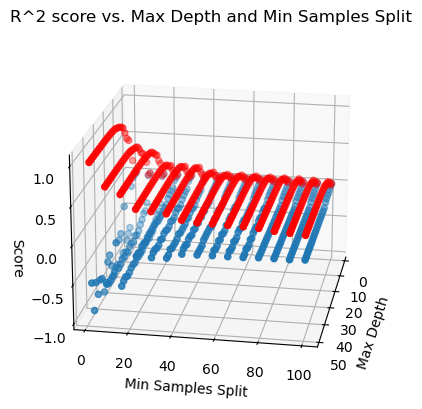

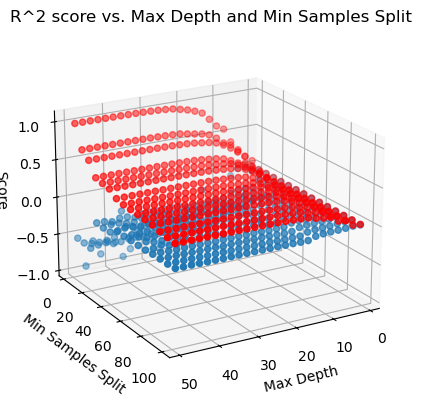

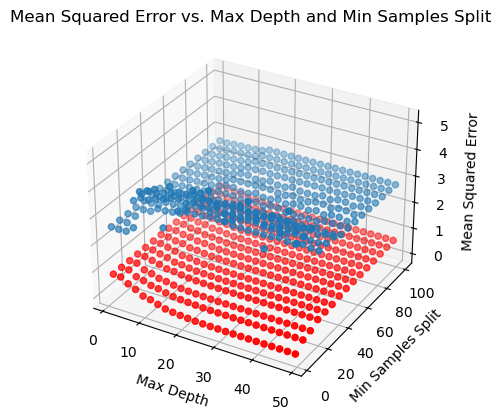

In [25]:
# plot a 3d scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(max_depths, min_samples_splits, scores)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Score')
# add another set of scores. plot in a different color
new_scores = scores_train
ax.scatter(max_depths, min_samples_splits, new_scores, c='r')
# name the plot
plt.title("R^2 score vs. Max Depth and Min Samples Split")
ax.view_init(20, 10)
plt.show()

#show a new perspective, rotated 90 degrees
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(max_depths, min_samples_splits, scores)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Score')
# add another set of scores. plot in a different color
new_scores = scores_train
ax.scatter(max_depths, min_samples_splits, new_scores, c='r')
# name the plot
plt.title("R^2 score vs. Max Depth and Min Samples Split")
ax.view_init(20, 60)
plt.show()

# plot a 3d scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(max_depths, min_samples_splits, mse_list)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Mean Squared Error')
new_mse_list = mse_train_list
ax.scatter(max_depths, min_samples_splits, new_mse_list, c='r')
# name the plot
plt.title("Mean Squared Error vs. Max Depth and Min Samples Split")
plt.show()
